# 6.2: Exploring Relationships

## Libraries and Data Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [7]:
df = pd.read_csv(r'/Users/aaronreese/Desktop/Boat Data Project/2. Data/Prepared Data/boat_data_final.csv')

In [8]:
df.head()

,GBP Price,USD Price,Manufacturer,Condition,Fuel,Year Built,Length (Meters),Width (Meters),Material,Country Sold In,Number of views last 7 days
0,2969.93,3712.41,Rigiflex power boats,NEW,NaN,2017.0,4.00,1.90,NaN,Switzerland,226
1,2966.50,3708.13,Terhi power boats,NEW,NaN,2020.0,4.00,1.50,Thermoplastic,Germany,75
2,3355.30,4194.13,Marine power boats,NEW,NaN,NaN,3.69,1.42,Aluminium,Switzerland,124
3,2849.00,3561.25,Pioner power boats,NEW,NaN,2020.0,3.00,1.00,NaN,Denmark,64
4,2889.15,3611.44,Linder power boats,NEW,NaN,2019.0,3.55,1.46,Aluminium,Germany,58


In [11]:
df.corr()

/var/folders/xg/9wtmprmn2396bpwzl7d3cj9c0000gn/T/ipykernel_91540/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,GBP Price,USD Price,Year Built,Length (Meters),Width (Meters),Number of views last 7 days
GBP Price,1.000000,1.000000,0.105419,0.562680,0.518680,-0.008108
USD Price,1.000000,1.000000,0.105419,0.562680,0.518680,-0.008108
Year Built,0.105419,0.105419,1.000000,-0.202201,-0.104668,-0.113593
Length (Meters),0.562680,0.562680,-0.202201,1.000000,0.873093,-0.135011
Width (Meters),0.518680,0.518680,-0.104668,0.873093,1.000000,-0.157547
Number of views last 7 days,-0.008108,-0.008108,-0.113593,-0.135011,-0.157547,1.000000


# Variables 

In [9]:
# USD Price, Condition, Fuel, Length, Width, Material

In [21]:
sub = df[['USD Price','Condition','Fuel','Length (Meters)','Width (Meters)','Material']]

# Correlation Heatmap

/var/folders/xg/9wtmprmn2396bpwzl7d3cj9c0000gn/T/ipykernel_91540/3458554415.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(sub.corr())


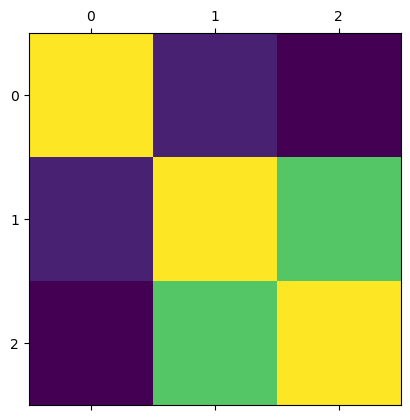

In [22]:
plt.matshow(sub.corr())
plt.show()

/var/folders/xg/9wtmprmn2396bpwzl7d3cj9c0000gn/T/ipykernel_91540/1795269963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(), fignum=f.number)


Text(0.5, 1.0, 'Correlation Matrix')

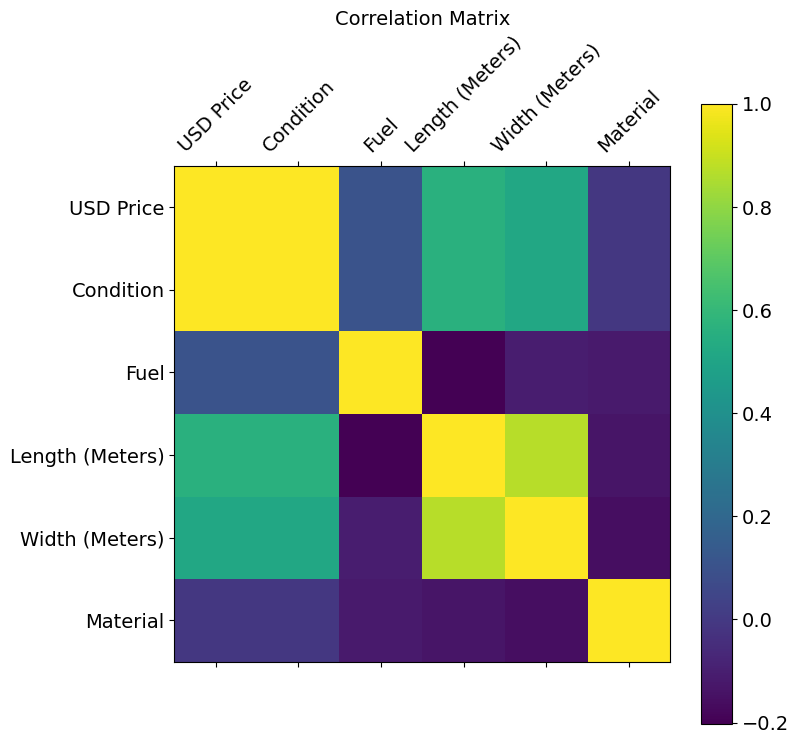

In [23]:
f = plt.figure(figsize=(8, 8)) 
plt.matshow(df.corr(), fignum=f.number) 
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) 
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) 
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14) 
plt.title('Correlation Matrix', fontsize=14)

### Relationships

In [24]:
# USD Price has a positive correlation with condition.
    # This is a normal assumption as new boats will typically cost more than used boats of the same size.
# As length increases, there's a positive correlation with width increasing as well; and vice versa.
    # This is to be expected as typically both measurements will increase due to the size of the boat.
# Fuel type has a negative correlation with length and width.
    # Larger boats most likely use a less common fuel type like diesel.
# Material has a negative correlation with all other variables.
# There is a neutral correlation between length and width when compared to USD Price and Condition.
    #This is interesting as the expectation would be for price to increase and length and width increase.

# Scatterplot

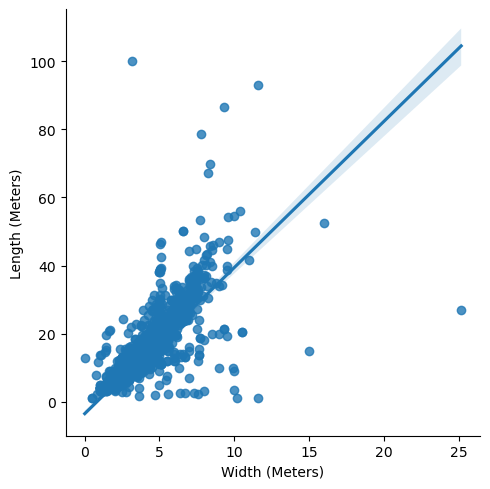

In [27]:
sns.lmplot(x = 'Width (Meters)', y = 'Length (Meters)', data = df)

In [28]:
# As expected, when the length of the boat increases, it's typical for the width to increase too.
# One outlier inidcates that there is a boat that is about 100 meters with less than 5 meter width.
    # This may be an issue with incorrect data being inputed in the data set.
# Majority of the boats are between 2 to 40 meter length and 2 to 10 meter width.

# Pair Plot

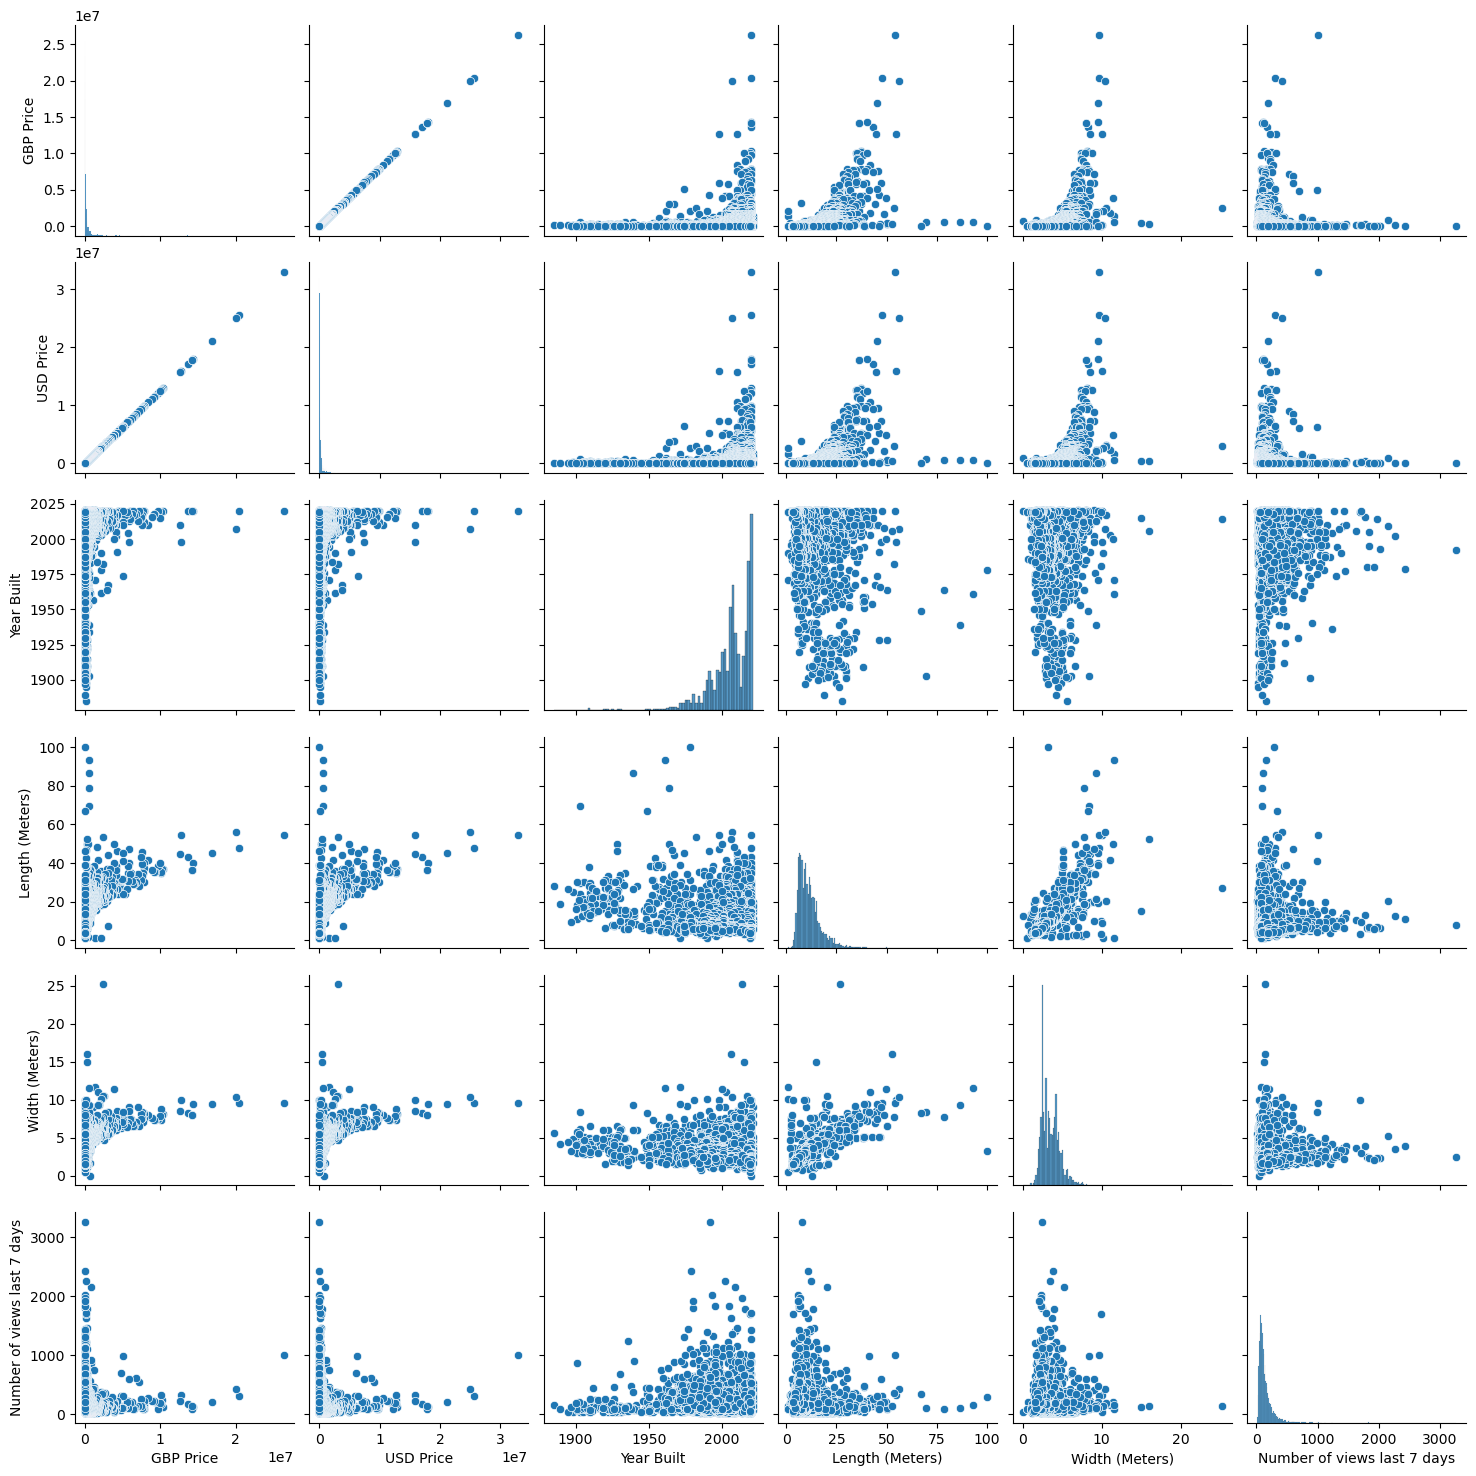

In [29]:
g = sns.pairplot(df)

In [30]:
# Price of boats remains largely the same up until recent decades.
    # It might be useful to explore why this may be the case as boats become more advanced and mass produced.
# Length and Width stay relatively similar over the years with a few outlying cases.
    # This could provie insight as which sizes of boats are most popular and why.
# Many views occur on boats that are lower in price and more expesnive boats.
    # While this is to be expected, it might be able to provide information on what features these buyers are looking for in their boats aside from price.

# Categorical Plot

<Axes: xlabel='Length (Meters)', ylabel='Count'>

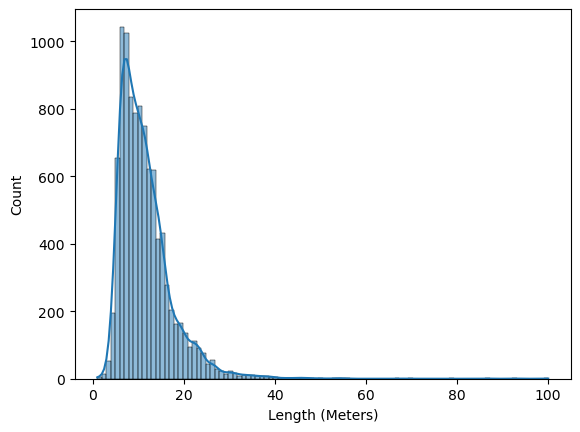

In [36]:
sns.histplot(df['Length (Meters)'], bins = 100, kde = True)

## Questions
### My questions didn't ask much it terms of what was covered in this lesson so I will write new question for this task.

In [37]:
# Does length and width correlate positively with price?
    # While this typically makes sense, according to the data, a large amount of larger boats do not correleate to a higher price.
    # There are most likely other factors involved that play into the specific price of a boat.
# Do views increase as boat prices decrease?
    # Yes as most people are more likely to look at boats that are within their budget.
# Do boats get larger the later they are built?
    # A vast majority of data entries show that over the course of mutliple decades, there is more diversity in boat sizes.
    # However, the majority of boats stay within the same size range for both length and width.

# Hypothesis

### Boat size does not play the most vital role in the price and popularity of a boat.  Other factors may be involved that caters to certain markets. (i.e.: fishing, luxery, industry, etc.)